<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descarga-los-datos-y-prepáralos-para-el-análisis" data-toc-modified-id="Descarga-los-datos-y-prepáralos-para-el-análisis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descarga los datos y prepáralos para el análisis</a></span></li><li><span><a href="#Descripción-de-los-datos" data-toc-modified-id="Descripción-de-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descripción de los datos</a></span></li><li><span><a href="#Informes-y-cálculos-de-métricas" data-toc-modified-id="Informes-y-cálculos-de-métricas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Informes y cálculos de métricas</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Descricpión del proyecto

Mi nombre es Guillermo Valdespino y soy un analista en el departamento analítico de Y.Afisha. En este proyecto, mi objetivo es optimizar los gastos de marketing de nuestra empresa. A través del análisis de los registros del servidor, los datos de visitas a Y.Afisha y las estadísticas de gastos de marketing, investigaré cómo los usuarios utilizan nuestro producto, cuándo comienzan a realizar compras, cuánto dinero generan y cuándo realizan los pagos.

**Instrucciones para completar el proyecto**

- Paso 1. Descarga los datos y prepáralos para el análisis
Almacena los datos de visitas, pedidos y gastos en variables. Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.


Rutas de archivos:

1. /datasets/visits_log_us.csv. Descarga el dataset
2. /datasets/orders_log_us.csv. Descarga el dataset
3. /datasets/costs_us.csv. Descarga el dataset


- Paso 2. Haz informes y calcula métricas

**Producto:**
¿Cuántas personas lo usan cada día, semana y mes?
¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
¿Cuál es la duración de cada sesión?
¿Con qué frecuencia los usuarios y las usuarias regresan?

**Ventas:**
¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
¿Cuántos pedidos hacen durante un período de tiempo dado?
¿Cuál es el tamaño promedio de compra?
¿Cuánto dinero traen? (LTV)

**Marketing:**
¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
¿Cuán rentables eran las inversiones? (ROI)
Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

- Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde
¿Qué fuentes/plataformas recomendarías? Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

## Descarga los datos y prepáralos para el análisis

Vamos a almacenar los datos de visitas, pedidos y gastos en variables. Después vamos a optimizar los datos para el análisis. Tenemos que asegurarnos que cada columna contenga el tipo de datos correcto.

Rutas de archivos:

- /datasets/visits_log_us.csv
- /datasets/orders_log_us.csv
- /datasets/costs_us.csv

In [1]:
# Impotamos las librerías
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

Para reducir el valor de **'memory usage'** de nuestros Dataframes, vamos a llamar a los archivos junto con los datos especificos para cada Dataframe.

Para el Dataframe **'visits'**:
- columna 'Device' = category type
- columnas 'End Ts' y 'Start Ts' = datetime type

Para el Dataframe **'orders'**:
- columna 'Buy Ts' = datetime type

Para el Dataframe **'costs'**:
- columna 'dt' = datetime type

In [2]:
# Cargamos los archivos de datos en DataFrames
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype = {'Device': 'category'}, parse_dates = ['End Ts', 'Start Ts'])
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])

In [3]:
# Veamos la información general de nuestros Dataframes y corroboramos el tipo de datos
print(visits.info())
print('*'*40)
print(orders.info())
print('*'*40)
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
******************

Podemos ver que el tipo de datos de nuestros Dataframes son adecuados, ahora vamos a analizar y describir cada Dataframe.

## Descripción de los datos

In [4]:
# Dataframe 'visits'
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

In [5]:
# Dataframe 'orders'
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.

In [6]:
# Dataframe 'costs'
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


La tabla costs (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.

Ahora vamos a analizar nuestros Dataframes para prepararlos para el análisis

In [7]:
# Buscamos valores nulos
print(visits.isnull().any())
print('*'*20)
print(orders.isnull().any())
print('*'*20)
print(costs.isnull().any())

Device       False
End Ts       False
Source Id    False
Start Ts     False
Uid          False
dtype: bool
********************
Buy Ts     False
Revenue    False
Uid        False
dtype: bool
********************
source_id    False
dt           False
costs        False
dtype: bool


In [8]:
# Buscamos valores duplicados
print(visits.duplicated().any())
print('*'*20)
print(orders.duplicated().any())
print('*'*20)
print(costs.duplicated().any())

False
********************
False
********************
False


In [9]:
# Veamos cuantas categorias tenemos en 'visits'
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

## Informes y cálculos de métricas

1. **Producto:**
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [10]:
# ¿Cuántas personas lo usan cada día, semana y mes?
visits['session_year'] = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date

dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_month']).agg({'Uid': 'nunique'}).mean()
print('Users per day:', int(dau_total))
print('Users per week:', int(wau_total))
print('Users per month:', int(mau_total))

Users per day: 907
Users per week: 5825
Users per month: 23228


Para resolver esta pregunta, utilizamos las métricas 'DAU', 'MAU' Y 'WAU' junto con las claves unicas de cada cliente para contar las personas que utilizan el producto, sin que estos se repitan.

In [11]:
#¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
day_sessions = visits.groupby('session_date').agg({'Uid': 'count'}).mean()
print('Average day sessions:', int(day_sessions))

Average day sessions: 987


Con este código podemos contemplar los inicios de sesión de usuarios, aunque estos se repitan.

In [12]:
# ¿Cuál es la duración de cada sesión?
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()/60
session_duration_avg = visits['session_duration'].mean()
print('Average duration session:', round(session_duration_avg, 2), 'minutes')

Average duration session: 10.72 minutes


Podemos ver que la duración promedio de cada sesión es de 10 minutos, parece un tiempo adecuado para poder analizar los productos de la página y tomar una desición.

In [13]:
# ¿Con qué frecuencia los usuarios y las usuarias regresan?
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100
print('Sticky Wau:',"%.2f" % sticky_wau, '%')
print('Sticky Mau:',"%.2f" % sticky_mau, '%')

Sticky Wau: 15.59 %
Sticky Mau: 3.91 %


Las métricas **'Sticky Wau'** y **'Sticky Mau'** representan el porcentaje de usuarios activos diarios en comparación con los usuarios activos semanales y mensuales, respectivamente. Indican qué tan comprometidos y constantes son los usuarios en términos de uso continuo del producto, los cuales no son tan buenos como nos gustaría. Necesitamos mejorar estos datos.

2. **Ventas:**
- ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

In [14]:
# ¿Cuándo la gente empieza a comprar?
first_purchase_dates = orders.groupby('Uid')['Buy Ts'].min()

first_purchase_dates.name = 'first_purchase_datetime'
orders = orders.join(first_purchase_dates, on='Uid')
orders.head()

,Buy Ts,Revenue,Uid,first_purchase_datetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


Bien, ya agregamos la columna donde vemos la fecha de la primer compra de cada usuario. Ahora vamos a agregar una columna donde muestre el primer inicio de sesion de cada usuario para así poder sacar la diferencia de fechas y ver cuando la gente tarda en realizar su primera compra.

In [15]:
# Agregamos nueva columna 'first_session_datetime'
first_session_ts = visits.groupby('Uid')['Start Ts'].min()

first_session_ts.name = 'first_session_datetime'
orders = orders.join(first_session_ts, on='Uid')
orders.head()

,Buy Ts,Revenue,Uid,first_purchase_datetime,first_session_datetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


In [16]:
# Calculamos la diferencia de fechas entre la primera sesión y la primera compra para cada usuario en minutos
orders['Conversion'] = ((orders['first_purchase_datetime'] - orders['first_session_datetime']).dt.seconds)/(60)


print(orders[['Uid', 'Conversion']].head(10))

                    Uid  Conversion
0  10329302124590727494         1.0
1  11627257723692907447        11.0
2  17903680561304213844         2.0
3  16109239769442553005        15.0
4  14200605875248379450        27.0
5  10402394430196413321         0.0
6  12464626743129688638         3.0
7   3644482766749211722         0.0
8  17542070709969841479         4.0
9   1074355127080856382         2.0


In [17]:
average_time_to_purchase = orders['Conversion'].mean()
median_time_to_purchase = orders['Conversion'].median()


print("Tiempo promedio de compra desde el primer inicio de sesión:", int(average_time_to_purchase), 'minutes')
print("Tiempo mediano de compra desde el primer inicio de sesión:", int(median_time_to_purchase), 'minutes')

Tiempo promedio de compra desde el primer inicio de sesión: 284 minutes
Tiempo mediano de compra desde el primer inicio de sesión: 20 minutes


In [18]:
orders['Conversion'].value_counts().head(20)

0.0     3929
1.0     3286
2.0     2545
3.0     2091
4.0     1719
5.0     1386
6.0     1382
7.0     1346
8.0      964
9.0      945
10.0     732
12.0     664
17.0     654
11.0     651
13.0     640
16.0     517
14.0     475
15.0     453
19.0     341
18.0     334
Name: Conversion, dtype: int64

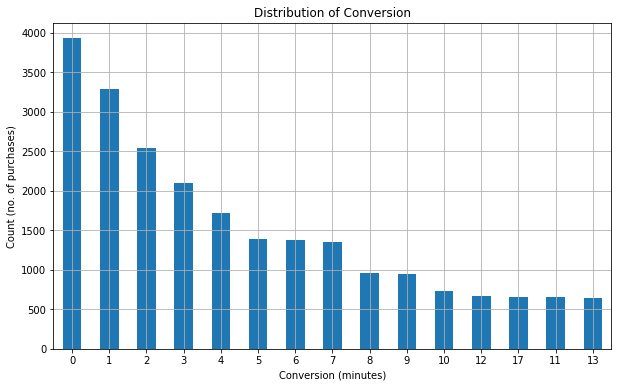

In [19]:
conversion_counts = orders['Conversion'].astype(int).value_counts().head(15)

plt.figure(figsize=(10, 6))
conversion_counts.plot(kind='bar')
plt.xlabel('Conversion (minutes)')
plt.ylabel('Count (no. of purchases)')
plt.title('Distribution of Conversion')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Aquí podemos ver que la mayor parte de los usuarios tienen a **realizar compras el mismo día de su primer inicio de sesión, aproximadamente a los 20 minutos**. Por esta razón es por la que utilizamos la mediana y no la media, ya que la media muestra el promedio de compra de todos los usuarios (17 días después del primer inicio de sesión)

Por un lado, es una buena señal, ya que la conversión es rápida y parece no tener problemas para ejecutar compras sin estar tan familiarizados con la página.

- ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [20]:
# Calculamos los meses de la cohorte y la duración de la conversión
orders['first_order_month'] = orders['first_purchase_datetime'].astype('datetime64[M]')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

orders['cohort_months'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['cohort_months'] = orders['cohort_months'].round().astype('int')

orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m') 

orders.head()

,Buy Ts,Revenue,Uid,first_purchase_datetime,first_session_datetime,Conversion,first_order_month,order_month,cohort_months
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06-01,0


Con estos calculos podemos establecer un teimpo determinado para analizar cuantos pedidos se realizan durante un tiempo dado. En este caso vamos a seleccionar el segundo semestre del año 2017.

In [21]:
start_date = '2017-06'
end_date = '2017-12'

orders_filtered = orders[(orders['order_month'] >= start_date) & (orders['order_month'] <= end_date)]

In [22]:
# Creamos una tabla pivotante con los datos de los cohortes
order_pivot = orders_filtered.pivot_table(
    index='first_order_month',
    columns='cohort_months',
    values='Uid',
    aggfunc='count',
)

order_pivot.fillna('') 

cohort_months,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,,
2017-09,2933.0,219.0,161.0,164.0,,,
2017-10,4964.0,314.0,162.0,,,,
2017-11,4813.0,397.0,,,,,
2017-12,5052.0,,,,,,


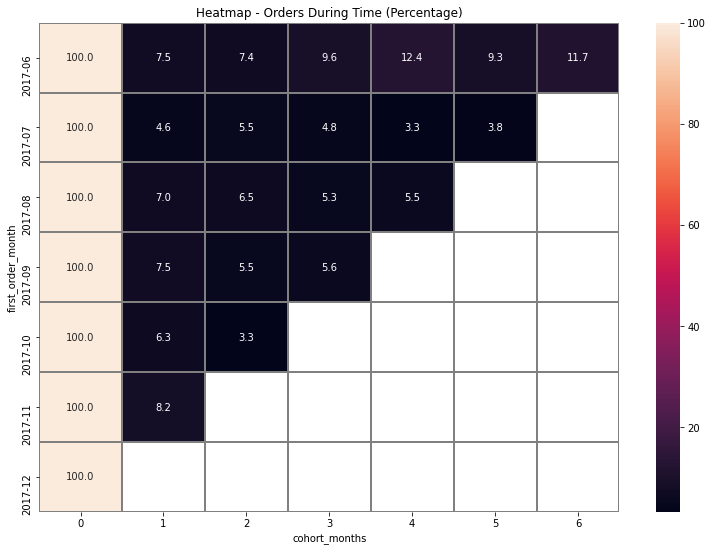

In [23]:
order_pivot_percentage = order_pivot.div(order_pivot.iloc[:, 0], axis=0) * 100

plt.figure(figsize=(13, 9))
plt.title("Heatmap - Orders During Time (Percentage)")
sns.heatmap(
    order_pivot_percentage,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

El heatmap muestra el número de pedidos en procentaje de cada mes para cada cohorte y permite visualizar fácilmente cómo evolucionan las conversiones a lo largo del tiempo para así facilitar la detección posibles patrones o tendencias. Podemos ver que las **compras** a partir de la primera, empiezan a **disminuir con el paso de los meses**, mientras que las **primeras compras van aumentendo con el paso de los meses.**

- ¿Cuál es el tamaño promedio de compra?

Tendremos que encontrar la media de la columna 'Revenue', esta contiene el monto de cada compra realizada. 

In [25]:
avg_purchase_size = orders['Revenue'].mean().round(1)
print(f'Average Purchase Size:', avg_purchase_size)

Average Purchase Size: 5.0


Esto significa que, en promedio, cada compra realizada tiene un valor de 5 unidades monetarias.
Veamos una gráfica donde se vea el promedio de compra por mes

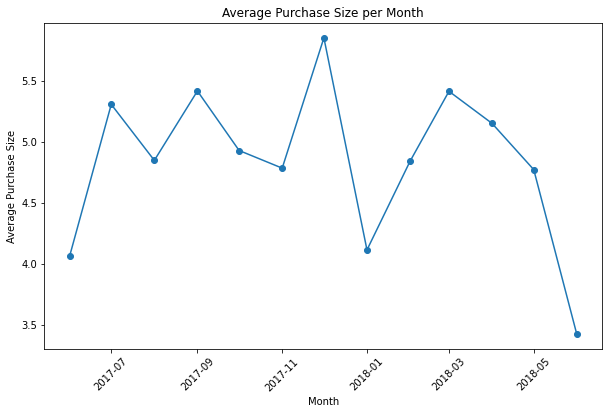

In [26]:
monthly_avg_purchase = orders.groupby('order_month')['Revenue'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_purchase.index, monthly_avg_purchase.values, marker='o')
plt.title('Average Purchase Size per Month')
plt.xlabel('Month')
plt.ylabel('Average Purchase Size')
plt.xticks(rotation=45)
plt.show()

- ¿Cuánto dinero traen? (LTV)

El LTV (lifetime value) es el valor "de vida" del cliente. Es la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras.

Es útil encontrar el LTV para diferentes cohortes. Repasemos lo que tenemos que hacer:

- encontrar la fecha de la primera compra de cada cliente;
- calcular el número de nuevos clientes para cada fecha (o rango de fechas, en este caso, para cada mes);
- añadir el mes del primer pedido a la tabla de pedidos;
- agrupar la tabla y calcular los ingresos.

In [27]:
# Recuperemos el mes de la primera compra de cada cliente:
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head() 

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Calcularemos el número de nuevos clientes (n_buyers) para cada mes:

In [28]:
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


Creamos cohortes. Vamos a agregar los meses de la primera compra de los clientes y clientas a la tabla de pedidos. Tambien agregaremos la edad de la cohorte en lugar del mes del pedido (representado por 'cohort_months'):

In [29]:
cohorts = orders.groupby(['first_order_month', 'cohort_months', 'order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,cohort_months,order_month,Revenue
0,2017-06,0,2017-06-01,9557.49
1,2017-06,1,2017-07-01,981.82
2,2017-06,2,2017-08-01,885.34
3,2017-06,3,2017-09-01,1931.30
4,2017-06,4,2017-10-01,2068.58


Las filas de la tabla 'cohorts' especifica los ingresos que generó la cohorte. Por ejemplo, en la fila 0 podemos ver que los clientes que realizaron su primer pedido en Junio de 2017 generaron un ingreso total de $9557.49 ese mes.

Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts, ya que, el LTV es el ingreso acumulado de una cohorte, que representa la cantidad de personas en la cohorte.

In [30]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head(13) 

,first_order_month,n_buyers,cohort_months,order_month,Revenue
0,2017-06,2023,0,2017-06-01,9557.49
1,2017-06,2023,1,2017-07-01,981.82
2,2017-06,2023,2,2017-08-01,885.34
3,2017-06,2023,3,2017-09-01,1931.30
4,2017-06,2023,4,2017-10-01,2068.58
5,2017-06,2023,5,2017-11-01,1487.92
6,2017-06,2023,6,2017-12-01,1922.74
7,2017-06,2023,7,2018-01-01,1176.56
8,2017-06,2023,8,2018-02-01,1119.15
9,2017-06,2023,9,2018-03-01,1225.51


Como podemos ver en la columna 'n-buyers' los primeros 12 clientes tienen la misma cantidad de clientes, ya que todos se refieren a la misma cohorte.

In [31]:
# Ahora si podemos caluclar el LTV:
report['ltv'] = report['Revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='cohort_months', values='ltv', aggfunc='mean'
)

output.fillna('') 

cohort_months,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09,5.644529,1.117586,0.52093,3.975792,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12,4.738191,0.260374,0.925097,1.065275,0.31293,0.338047,,,,,,
2018-01,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,
2018-02,4.156987,0.278274,0.078515,0.074144,,,,,,,,


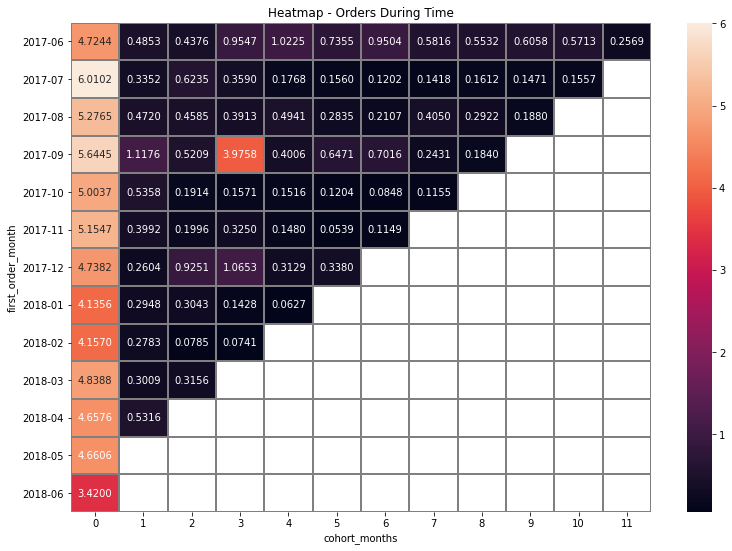

In [32]:
# Heatmap
plt.figure(figsize=(13, 9))
plt.title("Heatmap - Orders During Time")
sns.heatmap(
    output,
    annot=True,
    fmt='.4f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

In [33]:
# Encontremos el LTV de cada cohorte sumando el valor de cada mes:
for cohort_month, row in output.iterrows():
    ltv_cohort = row.sum()
    print(f"LTV {cohort_month}: {ltv_cohort:.2f}")

LTV 2017-06: 11.88
LTV 2017-07: 8.39
LTV 2017-08: 8.47
LTV 2017-09: 13.44
LTV 2017-10: 6.36
LTV 2017-11: 6.40
LTV 2017-12: 7.64
LTV 2018-01: 4.94
LTV 2018-02: 4.59
LTV 2018-03: 5.46
LTV 2018-04: 5.19
LTV 2018-05: 4.66
LTV 2018-06: 3.42


Estos valores son los promedios de ingresos generados por cada cliente en cada cohorte durante todo el año analizado.

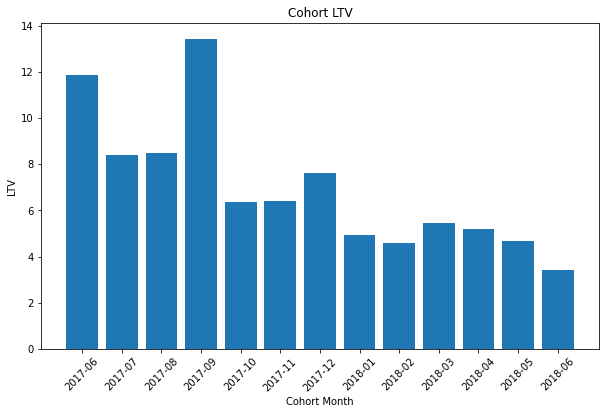

In [34]:
# Veamos estos valores en una gráfica
cohort_months = output.index
ltv_values = []

for _, row in output.iterrows():
    ltv_cohort = row.sum()
    ltv_values.append(ltv_cohort)

plt.figure(figsize=(10, 6))
plt.bar(cohort_months, ltv_values)
plt.title('Cohort LTV')
plt.xlabel('Cohort Month')
plt.ylabel('LTV')
plt.xticks(rotation=45)
plt.show()

- Como podemos ver, la cohorte de junio de 2017 (2017-06) tiene el LTV más alto, con un valor de 11.88. Esto sugiere que los clientes que realizaron su primera compra en ese mes tienen un mayor valor de vida útil, lo que implica que generan más ingresos a lo largo del tiempo.
- A medida que avanzamos en el tiempo, el LTV tiende a disminuir. Las cohortes más recientes, como la de junio de 2018 (2018-06), tienen valores de LTV más bajos (3.42), lo que puede indicar que estos clientes tienen un menor valor de vida útil o un comportamiento de compra menos activo.

En general, se puede decir que las cohortes más tempranas tienden a tener un mayor LTV, lo que indica una mayor rentabilidad y valor a largo plazo de los clientes adquiridos en esos períodos. Esto nos ayuda a valorar y tener más presente la importancia de fomentar la lealtad y retención de clientes.

3. **Marketing:**
- ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROI)

Trazaremos gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

In [35]:
# ¿Cuánto dinero se gastó? (Total)
total_costs = costs['costs'].sum()
print("Total de gastos del equipo de Marketing:", total_costs)

Total de gastos del equipo de Marketing: 329131.62


In [36]:
# ¿Cuánto dinero se gastó? (Por fuente)
spent_by_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
print("Gasto por fuente:")
print(spent_by_source)

Gasto por fuente:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


<Figure size 720x432 with 0 Axes>

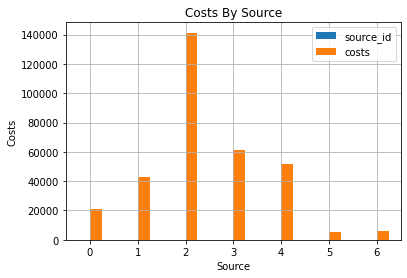

In [37]:
# Graficamos cuanto dinero se gastó por fuente
plt.figure(figsize=(10, 6))
spent_by_source.plot(kind='bar')
plt.title('Costs By Source')
plt.xlabel('Source')
plt.ylabel('Costs')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

- Como podemos ver, **la fuente de adquisición con el mayor gasto es la fuente 3**, con un total de **141,321.63 unidades monetarias.** Seguido de la fuente 4 que también muestra un gasto considerable de 61,073.60 unidades monetarias.
- Estos datos junto con el retorno de inversión será de mucha ayuda para el equipo de Marketing, ya que ayudará a tomar desiciones sobre recursos y asigranciones de presupuesto.

In [38]:
# ¿Cuánto dinero se gastó? (A lo largo del tiempo)
costs['dt'] = pd.to_datetime(costs['dt'])
costs_over_time = costs.groupby(pd.Grouper(key='dt', freq='M')).sum()
print("Gasto a lo largo del tiempo:")
print(costs_over_time)

Gasto a lo largo del tiempo:
            source_id     costs
dt                             
2017-06-30       1020  18015.00
2017-07-31       1054  18240.59
2017-08-31       1054  14790.54
2017-09-30       1020  24368.91
2017-10-31       1054  36322.88
2017-11-30       1020  37907.88
2017-12-31       1054  38315.35
2018-01-31       1054  33518.52
2018-02-28        952  32723.03
2018-03-31       1025  30415.27
2018-04-30        986  22289.38
2018-05-31       1054  22224.27


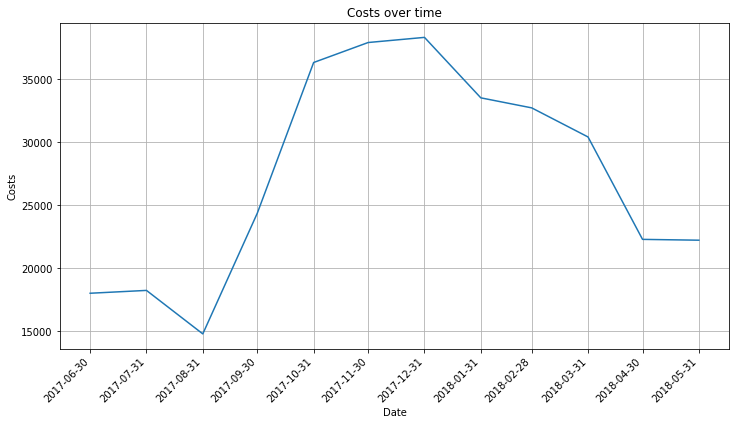

In [39]:
# Graficamos el gasto a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(costs_over_time.index, costs_over_time['costs'])
plt.title('Costs over time')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.xticks(rotation=45, ha='right')
plt.xticks(costs_over_time.index, rotation=45)
plt.grid(True)
plt.show()

En general, se observa un **aumento gradual del gasto en los primeros meses** (a partir del mes de Agosto), con un pico alcanzado en octubre de 2017, seguido de una ligera disminución hacia finales de año.

- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes? (CAC)

In [40]:
# Buscamos los gastos de cada mes
costs['month'] = costs['dt'].astype('datetime64[M]')
expense_per_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
expense_per_month['month'] = expense_per_month['month'].dt.strftime('%Y-%m') 
expense_per_month

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [41]:
# Calculamos el CAC Source Id / n_visitors
source_sizes = visits.groupby('Source Id').agg({'Uid': 'nunique'}).reset_index()
source_sizes.columns = ['Source Id', 'n_visitors']

cac_report = source_sizes.join(spent_by_source['costs'], how='left', on = 'Source Id')
cac_report['cac'] = cac_report['costs'] / cac_report['n_visitors']
cac_report

,Source Id,n_visitors,costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


el CAC representa el costo promedio de adquirir un cliente de cada fuente de origen.

Ahora vamos a agregar esta tabla a la tabla report para tener todos los datos necesarios para calcular el ROI en un mismo Dataframe.

In [42]:
report_= pd.merge(report, expense_per_month[['month', 'costs']], left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,cohort_months,order_month,Revenue,ltv,month,costs,cac
0,2017-06,2023,0,2017-06-01,9557.49,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,1,2017-07-01,981.82,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2,2017-08-01,885.34,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,3,2017-09-01,1931.30,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,4,2017-10-01,2068.58,1.022531,2017-06,18015.0,8.905091


Y ahora busquemos el ROMI (retorno de la inversión en marketing, o return on marketing investment en inglés) dividiendo el LTV por el CAC.

- ¿Cuán rentables eran las inversiones? (ROI)

In [43]:
report_['romi'] = report_['ltv'] / report_['cac']
roi_output = report_.pivot_table(
    index='first_order_month', columns='cohort_months', values='romi', aggfunc='mean'
)

cum_roi_output = roi_output.cumsum(axis=1).round(2)
cum_roi_output.fillna('')

cohort_months,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


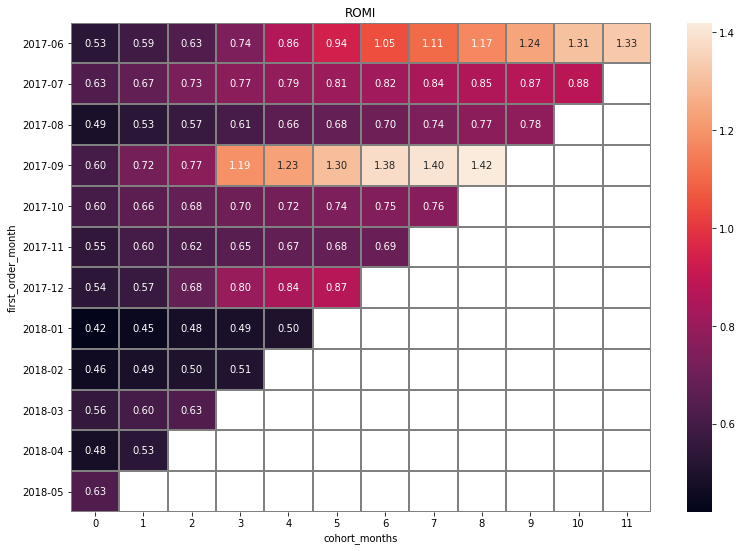

In [44]:
# Heatmap
plt.figure(figsize=(13, 9))
plt.title("ROMI")
sns.heatmap(
    cum_roi_output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

- La tabla muestra la rentabilidad acumulada para cada cohorte en función del número de meses transcurridos. Los valores acumulados representan la relación entre el valor del LTV (Lifetime Value) y el costo de adquisición del cliente (CAC) durante el período de tiempo.
- En general, a medida que aumenta el número de meses transcurridos desde la adquisición inicial, se observa un aumento en el ROMI acumulado. Esto indica que, en promedio, los ingresos generados por los clientes superan el costo de adquisición con el tiempo.
- La cohorte de junio valió la pena en el 7.° mes (ROMI = 1.05)
- Luego en septiembre, en el 4.° mes (ROMI = 1.19)
- Todas las demás cohortes no consiguieron compensar las inversiones hasta las fechas analizadas.

In [45]:
average_compensation = cum_roi_output.mean(axis=0)
print(average_compensation)

cohort_months
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64


En promedio, las cohortes compensan a partir del final del 7.º mes. Debemos tener en cuenta que los mayores gastos fueron en los meses:

- 2017-10	/ 36322.88
- 2017-11	/ 37907.88
- 2017-12	/ 38315.35

Lo cual ayudó a que los últimos meses fueran fructiferos para la empresa a esa magnitud.

## Conclusiones

En resumen, el equipo de marketing debe enfocarse en optimizar la adquisición de clientes, retener a los clientes existentes y realizar un seguimiento cercano de los costos y gastos. Al analizar el retorno de inversión de las cohortes, se pueden tomar decisiones informadas y estratégicas para garantizar la rentabilidad y el crecimiento sostenible del negocio.


Puntos a tener en cuenta:

- Eficiencia en la adquisición de clientes: Es importante optimizar las estrategias de adquisición de clientes para minimizar los costos y maximizar el retorno de inversión. Esto implica identificar los canales y tácticas más efectivas para alcanzar al público objetivo de manera eficiente.
**canal con más visitantes: 4 con 83525 visitantes**


- Retención de clientes: Fomentar la retención de clientes existentes puede ser fundamental para aumentar el valor de vida del cliente (LTV) y mejorar el retorno de inversión. Esto implica implementar estrategias de fidelización, ofrecer una excelente experiencia al cliente y brindar incentivos para que los clientes regresen y realicen compras repetidas.


En resumen, el equipo de marketing debe enfocarse en optimizar la adquisición de clientes, retener a los clientes existentes y realizar un seguimiento cercano de los costos y gastos. 

**A continuación, describiré los pasos generales que he seguido en este proyecto:**

- **Recopilación de datos:** Inicié el proyecto obteniendo los registros del servidor que contienen información sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018. Además, utilicé el archivo que contiene todos los pedidos realizados durante ese período. También revisé las estadísticas de gastos de marketing para tener una visión general de cómo se han asignado los recursos en ese periodo de tiempo.

- **Análisis del comportamiento del usuario:** Utilicé los registros del servidor y los datos de visitas para comprender cómo la gente utiliza nuestro producto. Examiné las páginas más visitadas, la duración promedio de las sesiones y otros indicadores relevantes para obtener una visión completa del comportamiento de los usuarios.

- **Análisis de la adquisición de clientes:** Investigé cuándo los usuarios comienzan a realizar compras después de su primera visita. Utilicé los datos de pedidos para identificar los patrones de compra y determinar el tiempo promedio que transcurre desde la primera visita hasta la primera compra.

- **Evaluación del valor del cliente:** Analicé cuánto dinero genera cada cliente para nuestro negocio. Utilicé los datos de pedidos para calcular el valor promedio de cada cliente y también examiné la distribución de los ingresos generados por los clientes.

- **Análisis del ciclo de vida del cliente:** Estudié cuándo los clientes realizan los pagos. Utilicé los datos de pedidos para identificar los patrones de pago y determinar el tiempo promedio que transcurre desde la primera compra hasta el primer pago.

- **Optimización de los gastos de marketing:** Utilicé las estadísticas de gastos de marketing para evaluar la eficiencia de nuestras inversiones actuales. Identifiqué los canales y tácticas de marketing más efectivos y propuse ajustes en nuestra estrategia para maximizar el retorno de la inversión.

- A lo largo de este proyecto, mi objetivo principal fue encontrar oportunidades para optimizar los gastos de marketing y mejorar la rentabilidad de Y.Afisha. Con el análisis detallado de los datos y los hallazgos clave obtenidos, pude proporcionar recomendaciones fundamentadas para el equipo de marketing y contribuir al éxito general de nuestra empresa.

Espero que los resultados obtenidos ayuden a mejorar y a implementar estrategias que contribuyan al éxito general de nuestra empresa.